In [ ]:
"""
군집화 = 레이블이 없다 : 데이터만 있고 데이터에 대해 따로 분류되어진게 없다 -> 비지도 학습에 속한다.
군집 알고리즘 - K-means clustering = 주어진 데이터 k개의 클러스터로 묶는 알고리즘(특징 비슷한 데이터 끼리 군집화)
                순서 : k값 설정 (시각화 - scatter plot, 
                                 elbow 그래프 - 최적의 k값 설정 : 군집의 중심점과 군집에 속한 data사이 거리가 작을수록 좋다)
                - k값/중심(랜덤) 설정 -> 데이터의 클러스터 결정 -> 클러스터 내 중심이동 
                  -> 중심이 데이터들간의 거리상 중간에 위치할떄까지 계속 반복 -> 중심이 변경되지 않을때까지 2,3번 반복       
                - 초기 k값 갯수, 중심점 설정에 따라 값이 변경 될수 있음
                - kmeans ++사용하면 중심점 최적으로 설정가능 
                  -> 임의의 데이터의 위치를 초기 중심점 위치로 설정 - > 초기 중심점으로부터 가장 멀리 떨어져있는 점을 두번째 중심점
                  -> 두개의 점과 가장 멀리 떨어져있는 점을 다음 중심점으로 설정 
                *군집과 군집사이의 거리는 멀리 군집에 속한 데이터 간의 거리는 가까울수록 좋은 데이터이다
비지도 학습 = 레이블이 없는 데이터에서 특징 파악해 일정 규칙 찾아내는 머신러닝 기법

계층적 군집화 - 순차적, 계층적으로 유사한 그룹과 통합하여 군집화 수행
-> 초기 데이터에서 가장 가까운 데이터들끼리 서로 묶어 군집 만들어 주고 이후 군집끼리 계속 수행하여 최종적으로 한개의 군집으로 만들어줌 
-여러개의 군집 사이 거리 구할경우 군집안의 어느 데이터를 기준으로 거리를 계산할것인가?
단일기준결합방식 - 군집안 데이터 사이 거리가 가장 최소가 되는 데이터들끼리중 가장 가까운 군집끼리 군집화한다(min)
완전기준결합방식 - 군집안 데이터 사이 거리가 가장 최대가 되는 데이터들끼리중 가장 가까운 거리를 가지는 군집끼리 군집화(max)
평균기준결합방식 - 모든점들 사이 거리 구해서 평균을 구해 가까운 군집끼리 군집화
centroids(중앙점) - 군집안 중앙점을 기준으로 가장 가까운 거리 갖는 군집끼리 군집화

선형구조를 띄는 데이터는 군집화가 잘되지만 비선형구조일경우에는 군집화가 잘 되지않음
밀도기반클러스터링(DB Scan) - 밀도를 기반으로 공간정보를 가지고 군집화하는것 -> 데이터들의 밀도가 높은 부분을 클러스터링
->설정한 기준점으로부터의 반경과 반경이내 데이터 갯수를 초기에 설정하고 그 반경안에 설정한 데이터 이상이 있으면 
  밀도가 높다 판단하여 군집화 (초기 기준점 = core point)
  -core point 조건을 만족하라면 반경이내 설정 갯수만큼 데이터가 있어야 하는데 만족못해 core point가 되지 못하고
   기준점에 속해지는 데이터는 경계점(border point)이라 한다.
  -core point는 다르지만 서로 다른 core point끼리 각각 군집에 속해지는 경우 서로다른 군집이 하나로 합쳐짐
  -core point가 될수도 없고 어느 군집에도 속하지 않는 데이터는 noise(이상치)데이터 라고 한다.
  -반경설정시 반경을 너무 크게 설정하면 서로 떨어져있는 데이터들끼리도 군집이 될수도 있어 원하는 형태의 군집 형성 안될수도 있음
  

K-NN 알고리즘 이용한 예측

"""

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [72]:
movie_dataset=pd.read_csv('title.basics.tsv',delimiter='\t')

C:\Users\user\AppData\Local\Temp\ipykernel_3420\601325470.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_dataset=pd.read_csv('title.basics.tsv',delimiter='\t')


In [73]:
movie_dataset

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10240753,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10240754,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10240755,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10240756,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [74]:
movie_ratings=pd.read_csv('title.ratings.tsv',delimiter='\t')

In [75]:
movie_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1892
3,tt0000004,5.5,178
4,tt0000005,6.2,2679
...,...,...,...
1359874,tt9916730,7.6,11
1359875,tt9916766,7.0,22
1359876,tt9916778,7.2,36
1359877,tt9916840,8.8,6


In [76]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240758 entries, 0 to 10240757
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 703.2+ MB


In [77]:
movie_dataset['startYear']

0           1894
1           1892
2           1892
3           1892
4           1893
            ... 
10240753    2009
10240754    2010
10240755    2010
10240756    2015
10240757    2014
Name: startYear, Length: 10240758, dtype: object

In [78]:
movie_dataset=movie_dataset[:100]
movie_dataset

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
95,tt0000097,short,"Place de l'Opéra, First View","Place de l'Opéra, 1er aspect",0,1896,\N,\N,"Documentary,Short"
96,tt0000098,short,"Place de l'Opéra, Second View","Place de l'Opéra, 2e aspect",0,1896,\N,\N,"Documentary,Short"
97,tt0000099,short,Place de la Bastille,Place de la Bastille,0,1896,\N,\N,"Documentary,Short"
98,tt0000100,short,Place de la Concorde,Place de la Concorde,0,1896,\N,\N,"Documentary,Short"


In [79]:
movie_ratings=movie_ratings[:100]
movie_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1892
3,tt0000004,5.5,178
4,tt0000005,6.2,2679
...,...,...,...
95,tt0000097,4.9,34
96,tt0000098,5.2,37
97,tt0000099,4.6,33
98,tt0000100,4.8,55


In [80]:
movie_dataset=movie_dataset[['startYear','runtimeMinutes']]
movie_dataset

,startYear,runtimeMinutes
0,1894,1
1,1892,5
2,1892,4
3,1892,12
4,1893,1
...,...,...
95,1896,\N
96,1896,\N
97,1896,\N
98,1896,\N


In [81]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   startYear       100 non-null    object
 1   runtimeMinutes  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [82]:
movie_dataset.startYear.value_counts()

1896    67
1895    18
1894     6
1892     3
1897     3
1898     2
1893     1
Name: startYear, dtype: int64

In [83]:
movie_dataset.runtimeMinutes.value_counts()

\N    56
1     38
5      1
4      1
12     1
45     1
2      1
3      1
Name: runtimeMinutes, dtype: int64

In [92]:
#movie_dataset의 모든 데이터 타입을 정수로 변환하세요
#\n 은 최빈수인 1로 일괄 변경
movie_dataset.startYear=movie_dataset.startYear.astype(int)
movie_dataset.startYear
movie_dataset.runtimeMinutes.replace('\\N','1',inplace=True)
movie_dataset.runtimeMinutes=movie_dataset.runtimeMinutes.astype(int)
movie_dataset

C:\Users\user\AppData\Local\Temp\ipykernel_3420\2595153303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataset.startYear=movie_dataset.startYear.astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_3420\2595153303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataset.runtimeMinutes.replace('\\N','1',inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3420\2595153303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,startYear,runtimeMinutes
0,1894,1
1,1892,5
2,1892,4
3,1892,12
4,1893,1
...,...,...
95,1896,1
96,1896,1
97,1896,1
98,1896,1


In [85]:
#movie_dataset['runtimeMinutes'][movie_dataset['runtimeMinutes'] == '\\N']
#movie_dataset.runtimeMinutes[movie_dataset.runtimeMinutes.str.contains('N')]=1
#movie_dataset.runtimeMinutes.replace(to_replace = '\\N', value = '1', inplace = True)
#movie_dataset.runtimeMinutes.replace("\\N","1", inplace=True)
movie_dataset[movie_dataset.runtimeMinutes=='\\N']
movie_dataset.loc[movie_dataset.runtimeMinutes=='\\N', 'runtimeMinutes']=1

C:\Users\user\AppData\Local\Temp\ipykernel_3420\3941749261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_dataset.loc[movie_dataset.runtimeMinutes=='\\N', 'runtimeMinutes']=1


In [86]:
movie_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2002
1,tt0000002,5.8,269
2,tt0000003,6.5,1892
3,tt0000004,5.5,178
4,tt0000005,6.2,2679
...,...,...,...
95,tt0000097,4.9,34
96,tt0000098,5.2,37
97,tt0000099,4.6,33
98,tt0000100,4.8,55


In [87]:
movie_ratings=movie_ratings.averageRating

In [88]:
movie_ratings

0     5.7
1     5.8
2     6.5
3     5.5
4     6.2
     ... 
95    4.9
96    5.2
97    4.6
98    4.8
99    4.5
Name: averageRating, Length: 100, dtype: float64

In [94]:
movie_dataset
#1892, 2 =>ratings?
#2020, 6 =>ratings?
#1900, 1 =>ratings?
#k=5

,startYear,runtimeMinutes
0,1894,1
1,1892,5
2,1892,4
3,1892,12
4,1893,1
...,...,...
95,1896,1
96,1896,1
97,1896,1
98,1896,1


In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
model= KNeighborsRegressor(n_neighbors=5, weights='distance')

In [97]:
model.fit(movie_dataset, movie_ratings)

KNeighborsRegressor(weights='distance')

In [101]:
#1892, 2 =>ratings?
#2020, 6 =>ratings?
#1900, 1 =>ratings?
#k=5
model.predict([[1892,2],[2020,6],[1900,1]])


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([5.96542182, 5.09853186, 5.025     ])

In [ ]:
#1.당뇨병 데이터셋 -2번 ~ 769번까지 데이터
 #트레인 데이터 : 2번 ~ 601번까지
 #테스트 데이터 : 602 ~ 769번까지

 
#2.암 분류기
#전체 569건의 데이터

#트레인 : 1번~400번까지
#테스트 : 401번~569번까지
======================================================
#트레인 데이터 -> KNN모델 -> 데스트 데이터
#모델에 대한 정확도 출려 ( 정확도 개선을 위한 다양한 노력)


In [254]:
diabetes=pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [255]:
train_data=diabetes[2:602]
test_data=diabetes[602:769]

In [256]:
train_dataLen=len(train_data)
train_dataLen

600

<Axes: >

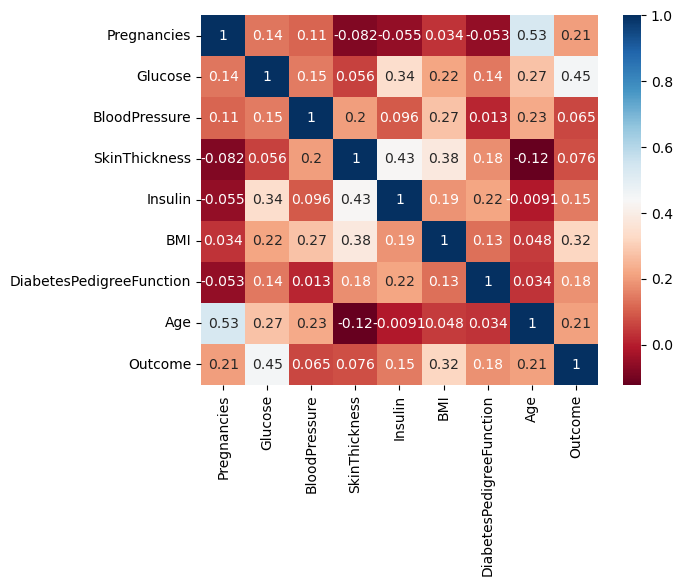

In [257]:
train_corr=train_data.corr()
sns.heatmap(train_corr,cmap='RdBu',annot=True)

In [258]:
total=train_data.append(test_data)
total

C:\Users\user\AppData\Local\Temp\ipykernel_3420\2486028155.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=train_data.append(test_data)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [259]:
total=total[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
total

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
5,5,116,0,25.6,0.201,30,0
6,3,78,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [260]:
total['Age_bin']=pd.qcut(total['Age'],4,labels=False)
total['Glucose_bin']=pd.qcut(total['Glucose'],5,labels=False)
total['Pregnancies_bin']=pd.qcut(total['Pregnancies'],5,labels=False)
total['BMI_bin']=pd.qcut(total['BMI'],9,labels=False)
total['DiabetesPedigreeFunction_bin']=pd.qcut(total['DiabetesPedigreeFunction'],8,labels=False)
total

C:\Users\user\AppData\Local\Temp\ipykernel_3420\2957720915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['Age_bin']=pd.qcut(total['Age'],4,labels=False)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_bin,Glucose_bin,Pregnancies_bin,BMI_bin,DiabetesPedigreeFunction_bin
2,8,183,0,23.3,0.672,32,1,2,4,4,0,6
3,1,89,94,28.1,0.167,21,0,0,0,0,2,0
4,0,137,168,43.1,2.288,33,1,2,3,0,8,7
5,5,116,0,25.6,0.201,30,0,2,2,3,1,1
6,3,78,88,31.0,0.248,26,1,1,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0,3,1,4,4,0
764,2,122,0,36.8,0.340,27,0,1,2,1,6,3
765,5,121,112,26.2,0.245,30,0,2,2,3,1,2
766,1,126,0,30.1,0.349,47,1,3,3,0,3,3


In [261]:
total=total[['Insulin','Age_bin','Glucose_bin','Pregnancies_bin','BMI_bin','DiabetesPedigreeFunction_bin','Outcome']]
total

,Insulin,Age_bin,Glucose_bin,Pregnancies_bin,BMI_bin,DiabetesPedigreeFunction_bin,Outcome
2,0,2,4,4,0,6,1
3,94,0,0,0,2,0,0
4,168,2,3,0,8,7,1
5,0,2,2,3,1,1,0
6,88,1,0,2,4,2,1
...,...,...,...,...,...,...,...
763,180,3,1,4,4,0,0
764,0,1,2,1,6,3,0
765,112,2,2,3,1,2,0
766,0,3,3,0,3,3,1


In [267]:
train=total[:train_dataLen]
train

,Insulin,Age_bin,Glucose_bin,Pregnancies_bin,BMI_bin,DiabetesPedigreeFunction_bin,Outcome
2,0,2,4,4,0,6,1
3,94,0,0,0,2,0,0
4,168,2,3,0,8,7,1
5,0,2,2,3,1,1,0
6,88,1,0,2,4,2,1
...,...,...,...,...,...,...,...
597,25,0,0,0,2,5,0
598,0,2,4,0,6,0,1
599,120,1,1,0,0,4,0
600,0,0,1,0,2,4,0


In [268]:
xtrain=train.drop(columns=['Outcome'])
ytrain=train['Outcome']

In [270]:
test=total[train_dataLen:]
test

,Insulin,Age_bin,Glucose_bin,Pregnancies_bin,BMI_bin,DiabetesPedigreeFunction_bin,Outcome
602,0,2,2,0,2,0,0
603,126,3,4,3,6,6,1
604,0,2,4,2,2,1,1
605,0,0,2,0,6,5,0
606,293,0,4,0,7,7,1
...,...,...,...,...,...,...,...
763,180,3,1,4,4,0,0
764,0,1,2,1,6,3,0
765,112,2,2,3,1,2,0
766,0,3,3,0,3,3,1


In [288]:
xtest=test.drop(columns=['Outcome'])
ytest=test['Outcome']

In [273]:
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [275]:
xtrain=scaler.transform(xtrain)
xtrain

array([[-0.68327145,  0.5291612 ,  1.46437687,  1.52495749, -1.51132114,
         1.06396476],
       [ 0.12433401, -1.27479743, -1.36078751, -1.18006688, -0.74415305,
        -1.57214889],
       [ 0.76010853,  0.5291612 ,  0.75808577, -1.18006688,  1.55735122,
         1.50331704],
       ...,
       [ 0.34771425, -0.37281811, -0.65449641, -1.18006688, -1.51132114,
         0.18526021],
       [-0.68327145, -1.27479743, -0.65449641, -1.18006688, -0.74415305,
         0.18526021],
       [-0.68327145, -0.37281811, -0.65449641,  0.8487014 , -1.51132114,
        -1.13279662]])

In [277]:
xtest=scaler.transform(xtest)
xtest

array([[-0.68327145,  0.5291612 ,  0.05179468, -1.18006688, -0.74415305,
        -1.57214889],
       [ 0.39926353,  1.43114051,  1.46437687,  0.8487014 ,  0.79018313,
         1.06396476],
       [-0.68327145,  0.5291612 ,  1.46437687,  0.1724453 , -0.74415305,
        -1.13279662],
       [-0.68327145, -1.27479743,  0.05179468, -1.18006688,  0.79018313,
         0.62461249],
       [ 1.83405196, -1.27479743,  1.46437687, -1.18006688,  1.17376718,
         1.50331704],
       [-0.33101801, -0.37281811, -1.36078751, -1.18006688, -1.51132114,
         0.18526021],
       [ 1.65362946, -0.37281811,  1.46437687, -1.18006688,  1.55735122,
        -0.69344434],
       [ 0.88039019, -1.27479743,  0.05179468, -1.18006688, -1.51132114,
        -1.57214889],
       [ 0.67419305, -1.27479743, -0.65449641,  0.1724453 , -0.360569  ,
        -0.25409207],
       [ 0.98348876,  0.5291612 ,  1.46437687,  0.1724453 ,  0.02301504,
         0.62461249],
       [ 2.07461529,  0.5291612 ,  1.46437687,  0.

In [279]:
clf=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9,11,13,15,17,19]}

In [280]:
gs=GridSearchCV(clf,param_grid=params,cv=5,scoring='roc_auc')

In [281]:
gs=GridSearchCV(clf, param_grid=params, cv=5,scoring='roc_auc')

In [282]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='roc_auc')

In [289]:
print(gs.best_score_)
print(gs.best_estimator_)

0.813378897525239
KNeighborsClassifier(n_neighbors=19)


In [284]:
pred=gs.predict(xtest)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [290]:
print(accuracy_score(ytest, pred))

print(confusion_matrix(ytest, pred))

0.7710843373493976
[[94 12]
 [26 34]]
